<a href="https://colab.research.google.com/github/Nirmal314/Harmonize-py/blob/neural_network/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preprocessing and Feature Selection**

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('cleaned_dataset.csv')
df = pd.DataFrame(data)
df = df.dropna()

# Assuming df is your DataFrame with the Spotify dataset
features = ['valence', 'energy', 'danceability', 'acousticness', 'loudness', 'tempo', 'instrumentalness', 'liveness']

# Select relevant features
X = df[features]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(X_scaled, columns=features)

**PCA Dimensionality Reduction**

In [4]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the DataFrame
df_scaled['PCA1'] = X_pca[:, 0]
df_scaled['PCA2'] = X_pca[:, 1]


**K-means Clustering**

In [5]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Mapping Clusters to Categories**

In [6]:
# Calculate cluster centroids
centroids = kmeans.cluster_centers_

# Create a mapping based on centroid characteristics
category_mapping = {
    0: 'RELAXING',  # Low energy, high acousticness
    1: 'CALM',      # Moderate valence, low energy
    2: 'SAD',       # Low valence, high acousticness
    3: 'HAPPY',     # High valence, high danceability
    4: 'ENERGETIC', # High energy, high tempo
    5: 'CONFIDENT', # High valence, high danceability, moderate energy
    6: 'SCARY'      # Low valence, high energy, low acousticness
}

# Apply mapping to create labels
df_scaled['category'] = df_scaled['cluster'].map(category_mapping)

df_scaled['category'].head(10)

,category
0,RELAXING
1,SCARY
2,HAPPY
3,SCARY
4,SCARY
5,RELAXING
6,SCARY
7,RELAXING
8,RELAXING
9,HAPPY


**Neural Network Classifier**

In [7]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare the data
X = df_scaled[features]
y = df_scaled['category']

# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Map predictions back to category labels
y_pred_labels = le.inverse_transform(y_pred_classes)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1795/1795 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8641 - loss: 0.4748 - val_accuracy: 0.9752 - val_loss: 0.0682
Epoch 2/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9741 - loss: 0.0664 - val_accuracy: 0.9795 - val_loss: 0.0552
Epoch 3/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9794 - loss: 0.0524 - val_accuracy: 0.9798 - val_loss: 0.0463
Epoch 4/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9825 - loss: 0.0456 - val_accuracy: 0.9810 - val_loss: 0.0449
Epoch 5/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9840 - loss: 0.0396 - val_accuracy: 0.9851 - val_loss: 0.0362
Epoch 6/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9845 - loss: 0.0377 - val_accuracy: 0.9850 - val_loss: 0.0370
Epoch 7/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9866 - loss: 0.0337 - val_accuracy: 0.9874 - val_loss: 0.0313
Epoch 8/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9862 - loss: 0.0348 - val_accurac

**Evaluation and Analysis**

              precision    recall  f1-score   support

        CALM       1.00      0.97      0.98      1297
   CONFIDENT       0.97      1.00      0.98      1270
   ENERGETIC       1.00      0.99      0.99      1957
       HAPPY       0.99      0.99      0.99      3006
    RELAXING       0.99      1.00      0.99      4552
         SAD       0.99      0.99      0.99      2572
       SCARY       1.00      0.98      0.99      3294

    accuracy                           0.99     17948
   macro avg       0.99      0.99      0.99     17948
weighted avg       0.99      0.99      0.99     17948



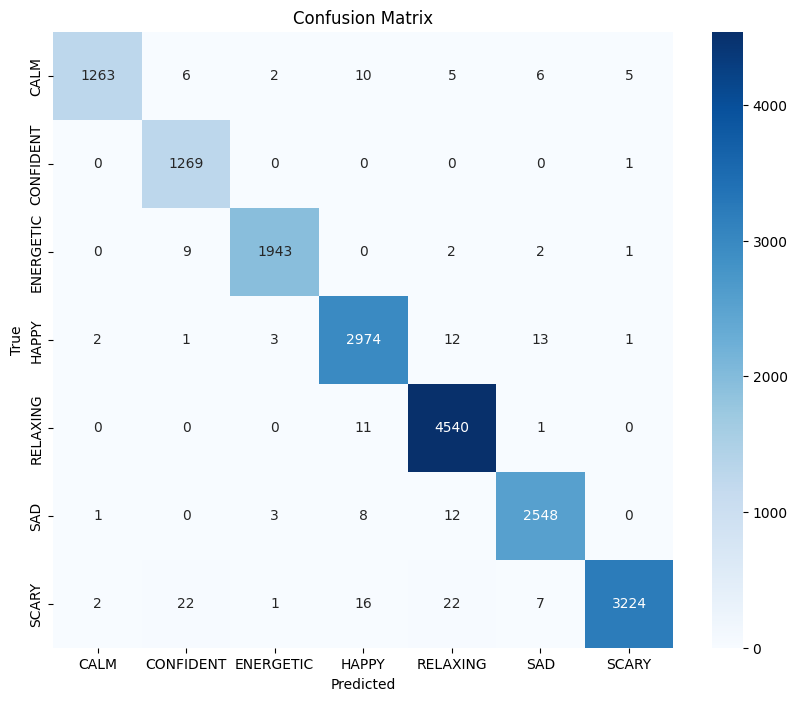

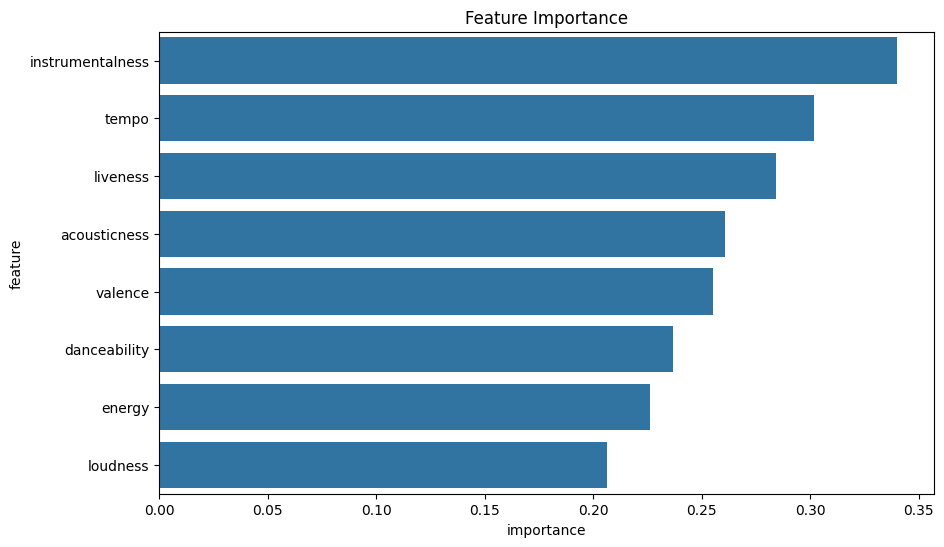

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature importance
feature_importance = model.layers[0].get_weights()[0]
feature_importance = np.mean(np.abs(feature_importance), axis=1)
feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

**Exporting the Trained Model**

In [10]:
import os
import pickle
from tensorflow.keras.models import load_model

# Create a directory to store the model and related files
os.makedirs('song_emotion_model', exist_ok=True)

# Save the entire model (architecture + weights)
model.save('song_emotion_model/full_model.h5')

# Save only the model weights
model.save_weights('song_emotion_model/model.weights.h5')

# Save the label encoder
with open('song_emotion_model/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

# Save the feature scaler
with open('song_emotion_model/feature_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and related files saved in 'song_emotion_model' directory.")

# Example of how to load the model and make predictions
def load_and_predict(features):
    # Load the model
    loaded_model = load_model('song_emotion_model/full_model.h5')

    # Load the label encoder
    with open('song_emotion_model/label_encoder.pkl', 'rb') as f:
        loaded_le = pickle.load(f)

    # Load the feature scaler
    with open('song_emotion_model/feature_scaler.pkl', 'rb') as f:
        loaded_scaler = pickle.load(f)

    # Scale the input features
    scaled_features = loaded_scaler.transform(features)

    # Make predictions
    predictions = loaded_model.predict(scaled_features)
    predicted_classes = np.argmax(predictions, axis=1)

    # Convert numeric predictions to category labels
    predicted_categories = loaded_le.inverse_transform(predicted_classes)

    return predicted_categories

Model and related files saved in 'song_emotion_model' directory.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted emotions for new songs: ['SAD']


**Example usage**

In [ ]:
new_song = pd.DataFrame({
    'valence': [0.472],
    'energy': [0.662],
    'danceability': [0.512],
    'acousticness': [0.0275],
    'loudness': [-6.797],
    'tempo': [180.114],
    'instrumentalness': [0],
    'liveness': [0.118]
})

predicted_emotions = load_and_predict(new_song)
print("Predicted emotions for new songs:", predicted_emotions)

**Predict Emotions for Spotify Playlist Songs**

In [14]:
import spotipy
import os
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import tensorflow as tf
import pickle

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id='251dd6e14b55484b93669bd4cc944d2d',
                                               client_secret='1ff83134e6d94951ab0375b815f3ba1e',
                                               redirect_uri='https://google.com'
                                               ))

# Fetch playlist tracks
playlist_id = '2uORYX3pVmRBUJe8uXrK8H'
results = sp.playlist_tracks(playlist_id)
tracks = results['items']

# Extract features, names, and URLs
data = []
names = []
urls = []
for track in tracks:
    song_id = track['track']['id']
    features = sp.audio_features(song_id)[0]
    if features is not None:
        data.append(features)
        names.append(track['track']['name'])
        urls.append(track['track']['external_urls']['spotify'])

# Convert to DataFrame
df = pd.DataFrame(data)

# Select relevant features (make sure these match the features used in training)
features = ['valence', 'energy', 'danceability', 'acousticness', 'loudness', 'tempo', 'instrumentalness', 'liveness']
X = df[features]

# Load the trained model and related components
model = tf.keras.models.load_model('model/full_model.h5')
with open('model/label_encoder.pkl', 'rb') as f:
    le = pickle.load(f)
with open('model/feature_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Preprocess the data
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_scaled = scaler.transform(X_imputed)

# Make predictions
predictions = model.predict(X_scaled)
predicted_classes = np.argmax(predictions, axis=1)
predicted_emotions = le.inverse_transform(predicted_classes)

# Create a DataFrame with results
results_df = pd.DataFrame({
    'Song Name': names,
    'Song URL': urls,
    'Predicted Emotion': predicted_emotions
})

# Print the results
print(results_df.to_string(index=False))

# Optionally, save the results to a CSV file
results_df.to_csv('playlist_emotions.csv', index=False)
print("\nResults have been saved to 'playlist_emotions.csv'")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
                                                                Song Name                                              Song URL Predicted Emotion
                                                                  7 Years https://open.spotify.com/track/5kqIPrATaCc2LqxVWzQGbk             HAPPY
                                                                  ROXANNE https://open.spotify.com/track/696DnlkuDOXcMAnKlTgXXK             HAPPY
                                                                 Careless https://open.spotify.com/track/61RsA1VPJu0JFVsxMxwW6b             HAPPY
                                                           Counting Stars https://open.spotify.com/track/2tpWsVSb9UEmDRxAl1zhX1             HAPPY
                                                            Dreams pt. II https://open.spotify.com/track/6hwF25W29VOWw1nZ76EAXY               SAD
                                              Godzilla (feat. Juice WRLD) https://ope